In [6]:
default_folder = 'res/npy/'
Otype = 'CARS'
maxexpnum = 3
prob_name = 'QING'
prob_name_list = [
    'CHNROSNB',
    'CHNRSNBM',
    'ERRINROS',
    'ERRINRSM',
    'HILBERTA',
    'HILBERTB',
    'LUKSAN11LS',
    'LUKSAN12LS',
    'LUKSAN13LS',
    'LUKSAN14LS',
    'LUKSAN15LS',
    'LUKSAN16LS',
    'LUKSAN17LS',
    'LUKSAN21LS',
    'LUKSAN22LS',
    'MANCINO',
    'POWERSUM',
    'PRICE3',
    'QING',
    'SENSORS',
    'STRTCHDV',
    'TRIGON1',
    'TRIGON2',
    'VANDANMSLS',
    'WATSON',
]

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import argparse
from os.path import exists

def plot_res(folder, paramoptions, Otype, pname, maxexpnum):
    numlines = 0
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    #fmin = np.min(errs) - 1e-30
    for expnum in range(maxexpnum):
        fname = folder + f"params_{paramoptions}/{Otype}_{pname}_{expnum}.npy"
        if exists(fname):
            numlines = numlines + 1
            err_gnorm = np.load(fname)
            errs = err_gnorm[0,:]
            gnorms = err_gnorm[1,:]
            maxiter = errs.size
            iters = 1+3*np.array(range(0, maxiter))


            ax1.plot(iters, errs, label=f"{expnum}")
            ax1.set_yscale('log')
            ax1.title.set_text(f'{Otype}: {pname} vs #queries')


            ax2.plot(iters, gnorms, label=f"{expnum}")
            ax2.set_yscale('log')
            ax2.title.set_text(f'{Otype}: |grad({pname})| vs #queries')
        else:
            print(f"File/Folder doesn't exist: {fname}")
    if numlines>0:
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()
    else:
        plt.close()

def plot_res_mult(folder, paramoptions_list, Otype, pname, maxexpnum):
    nres = len(paramoptions_list)
    numlines = 0
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    linestyles = ['-', '--', '-.', ':']
    colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    for i in range(nres):
        for expnum in range(maxexpnum):
            fname = folder + f"params_{paramoptions_list[i]}/{Otype}_{pname}_{expnum}.npy"
            if exists(fname):
                numlines = numlines + 1
                err_gnorm = np.load(fname)
                errs = err_gnorm[0,:]
                gnorms = err_gnorm[1,:]
                maxiter = errs.size
                iters = 1+3*np.array(range(0, maxiter))
                ax1.plot(iters, errs, label=f"{paramoptions_list[i]} [{expnum}]", linestyle=linestyles[i], color=colors[expnum])
                ax1.set_yscale('log')
                ax1.title.set_text(f'{Otype}: {pname} vs #queries')


                ax2.plot(iters, gnorms, label=f"{paramoptions_list[i]} [{expnum}]", linestyle=linestyles[i], color=colors[expnum])
                ax2.set_yscale('log')
                ax2.title.set_text(f'{Otype}: |grad({pname})| vs #queries')
    if numlines>0:
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()
    else:
        plt.close()

In [10]:
prob_name_list

['CHNROSNB',
 'CHNRSNBM',
 'ERRINROS',
 'ERRINRSM',
 'HILBERTA',
 'HILBERTB',
 'LUKSAN11LS',
 'LUKSAN12LS',
 'LUKSAN13LS',
 'LUKSAN14LS',
 'LUKSAN15LS',
 'LUKSAN16LS',
 'LUKSAN17LS',
 'LUKSAN21LS',
 'LUKSAN22LS',
 'MANCINO',
 'POWERSUM',
 'PRICE3',
 'QING',
 'SENSORS',
 'STRTCHDV',
 'TRIGON1',
 'TRIGON2',
 'VANDANMSLS',
 'WATSON']

In [8]:
paramoptions = 'samlltest'
for prob_name in prob_name_list:
    plot_res(default_folder, paramoptions, Otype, prob_name, maxexpnum)
# paramoptions = 'r0.1_M10_bgt10k'
# plot_res(default_folder, paramoptions, Otype, prob_name, maxexpnum)

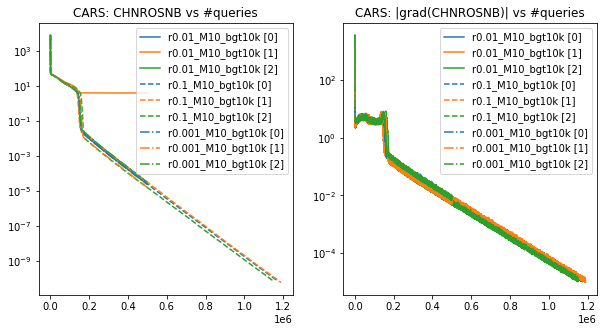

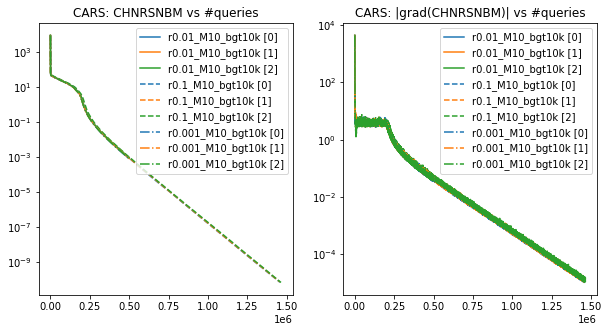

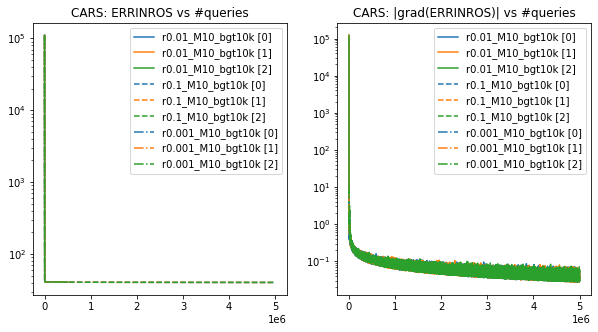

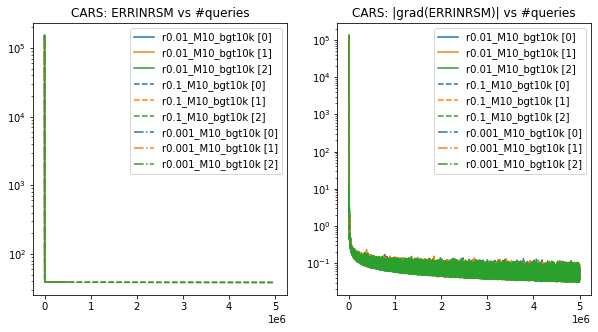

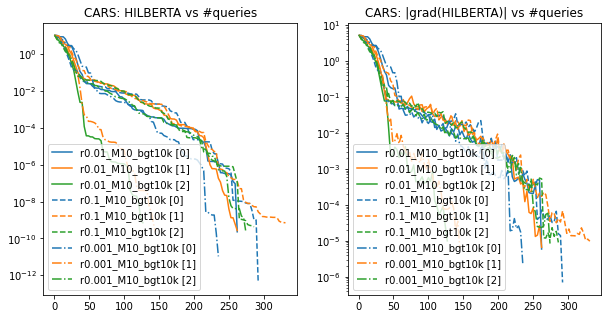

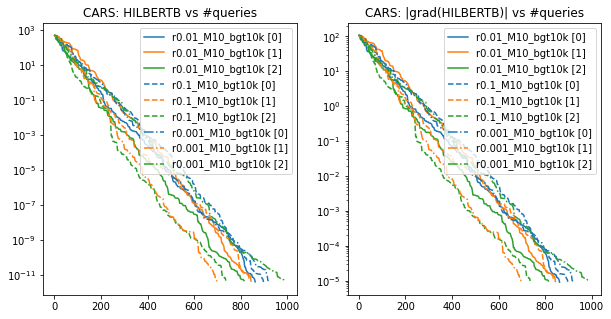

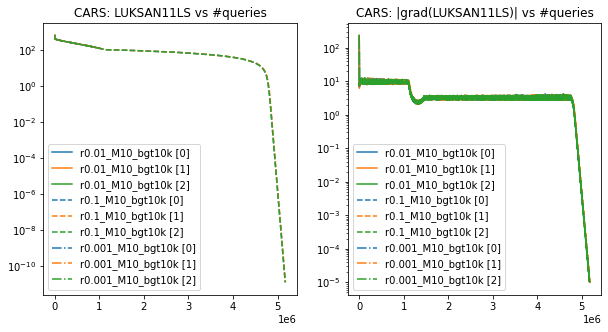

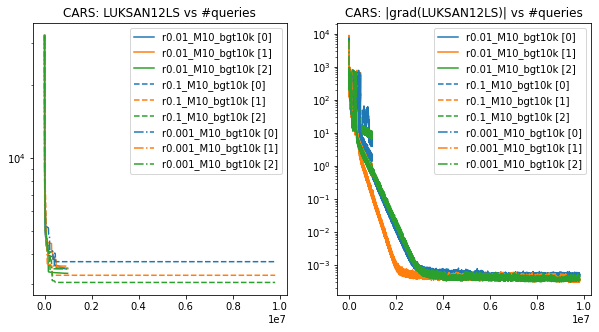

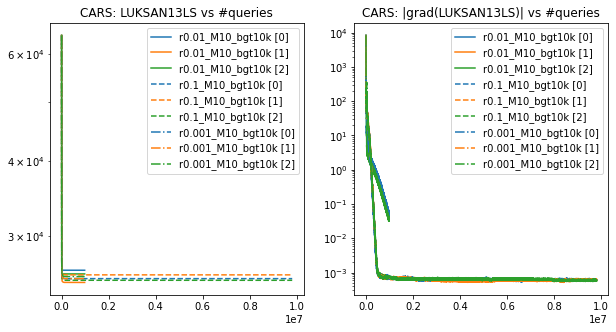

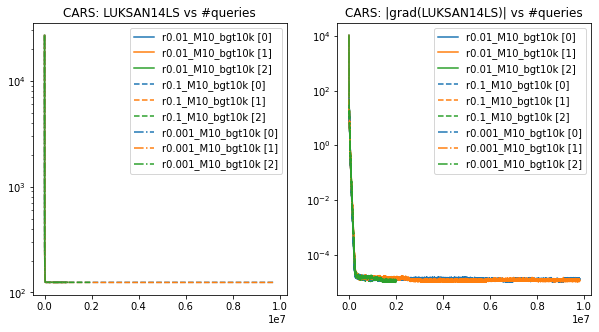

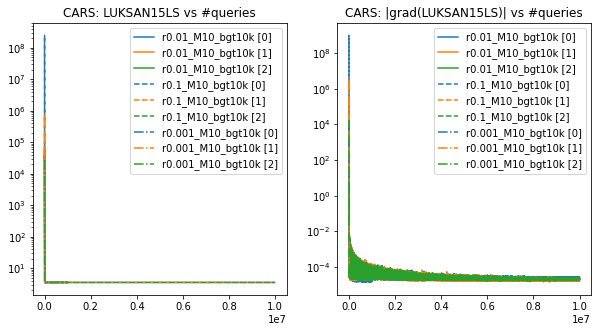

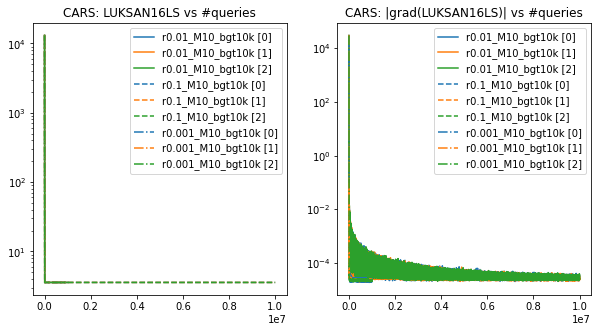

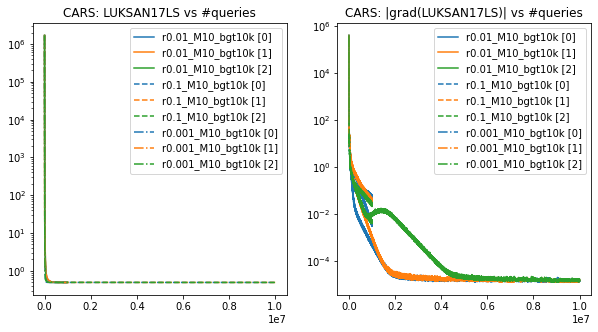

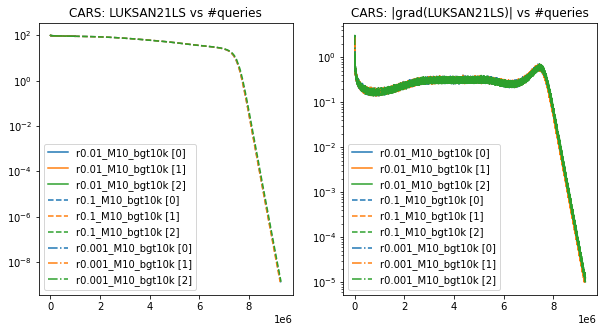

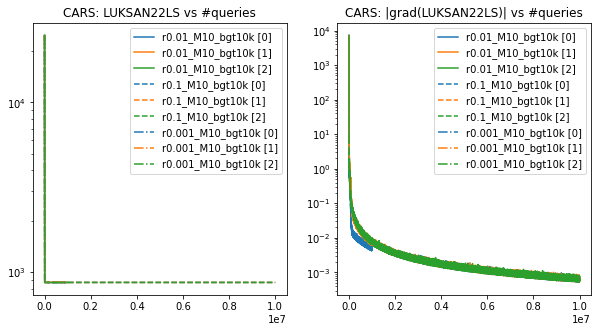

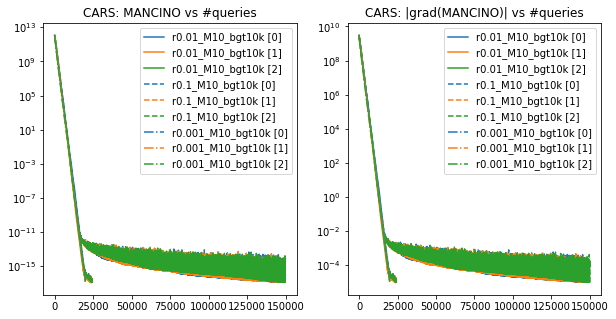

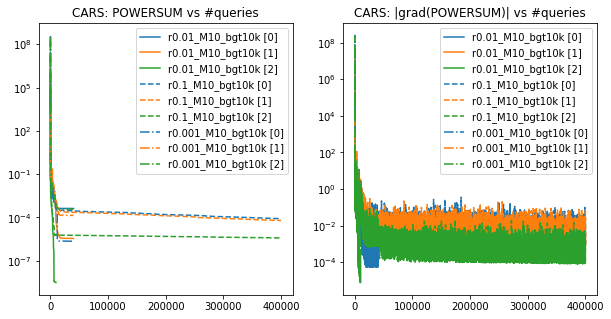

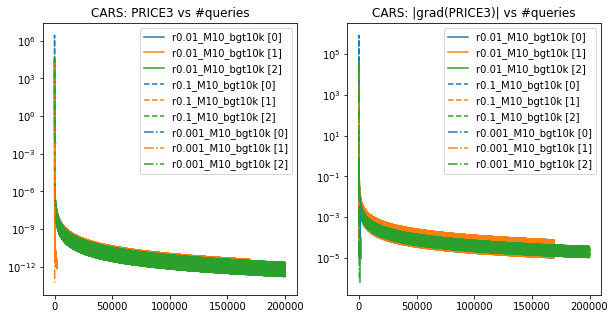

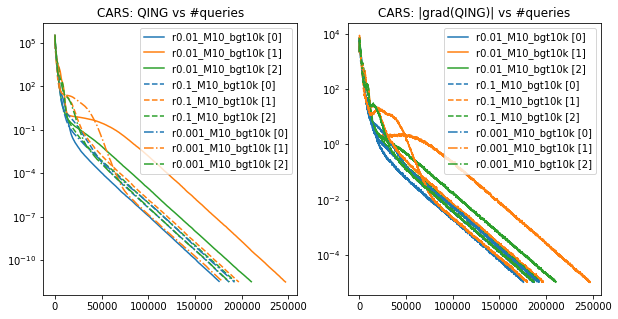

<ipython-input-2-5fcba532dea7>:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax1.set_yscale('log')
C:\Users\Bumsu\AppData\Roaming\Python\Python39\site-packages\ipykernel\pylab\backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


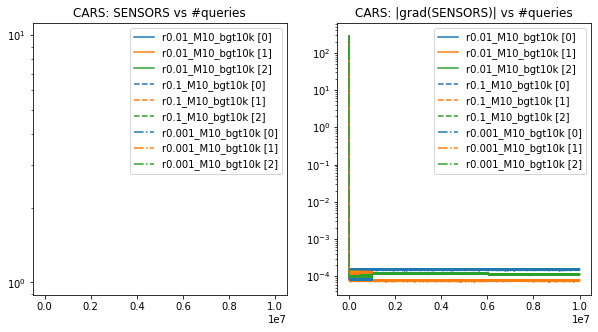

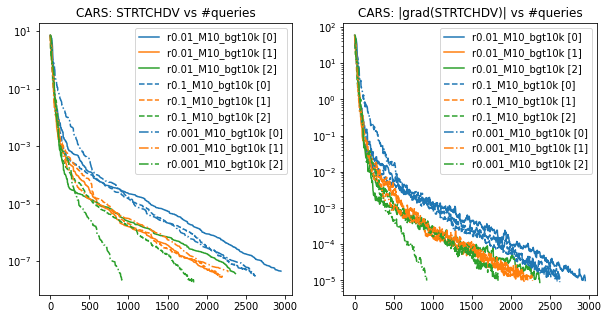

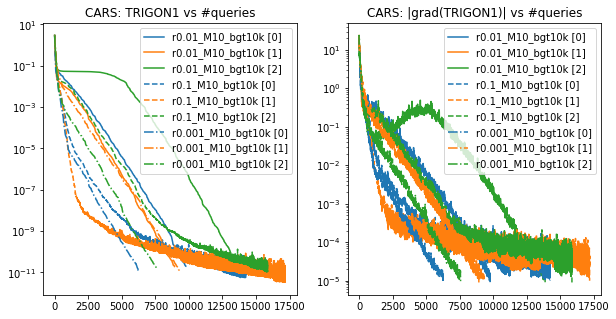

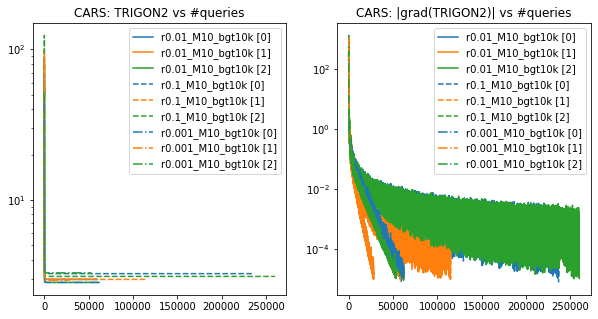

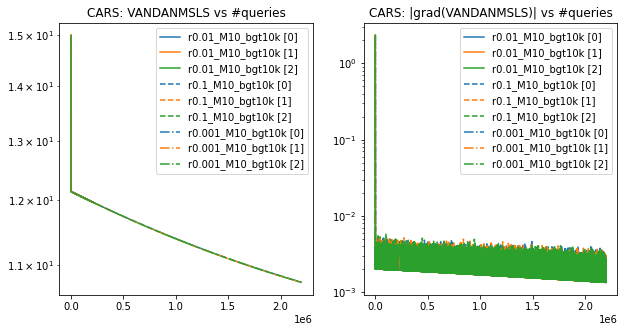

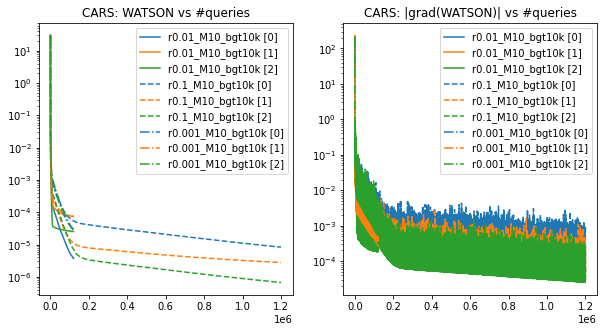

In [3]:
paramoptions_list = ['r0.01_M10_bgt10k', 'r0.1_M10_bgt10k', 'r0.001_M10_bgt10k']
for prob_name in prob_name_list:
    plot_res_mult(default_folder, paramoptions_list, Otype, prob_name, maxexpnum)

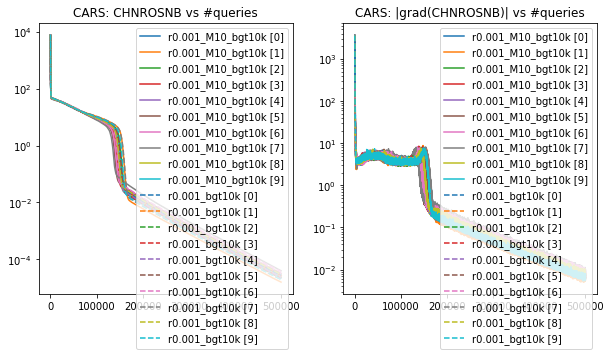

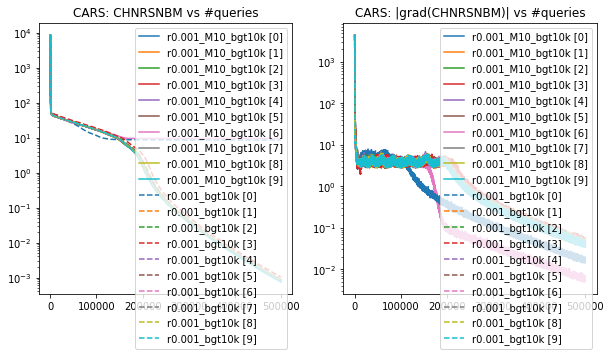

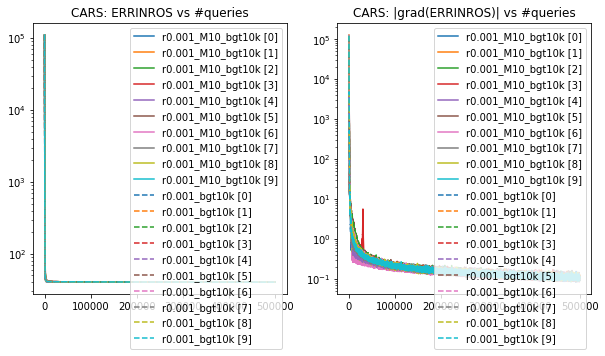

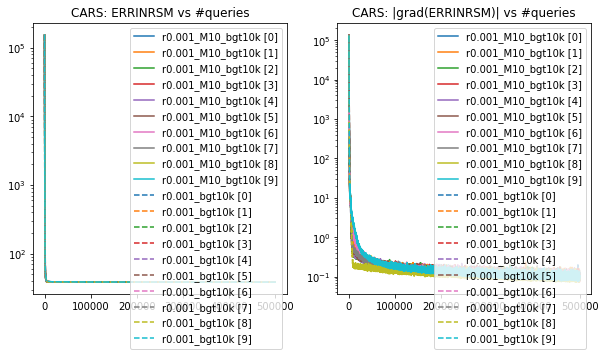

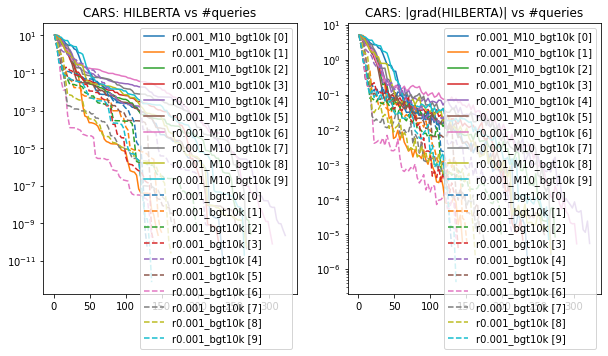

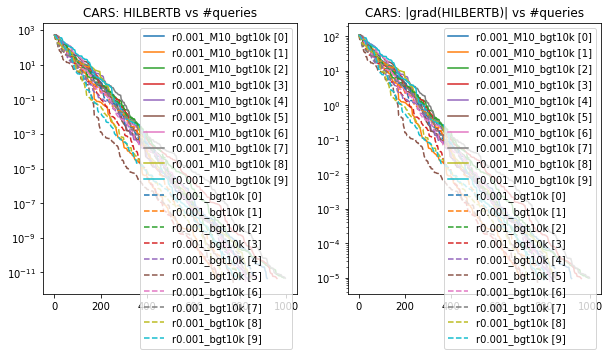

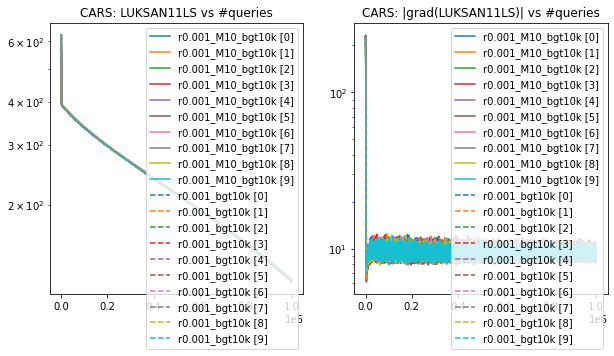

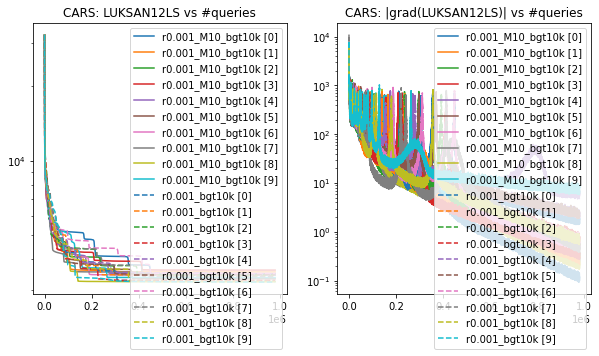

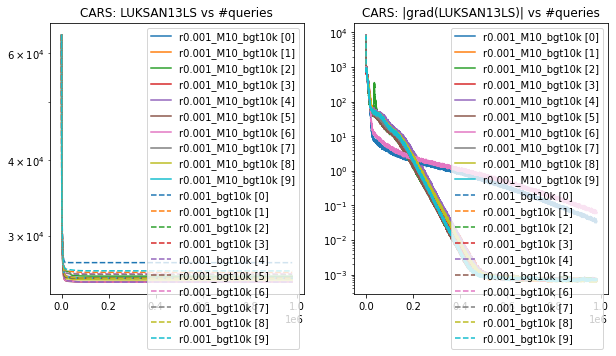

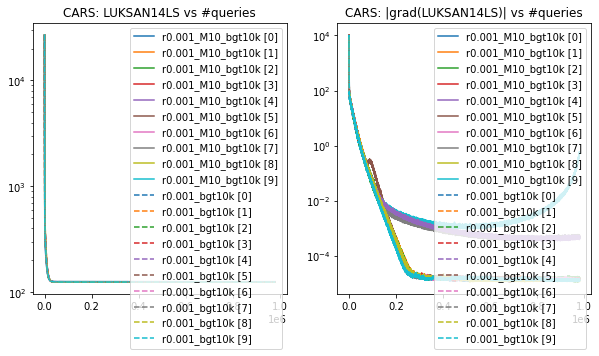

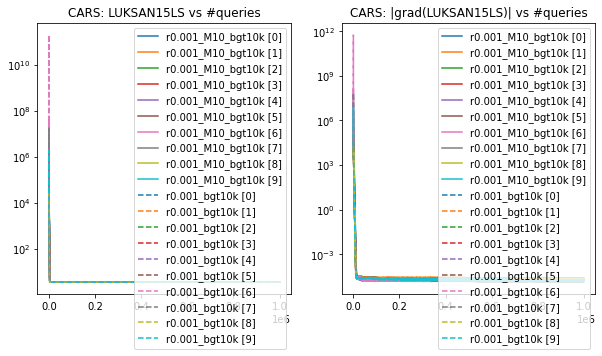

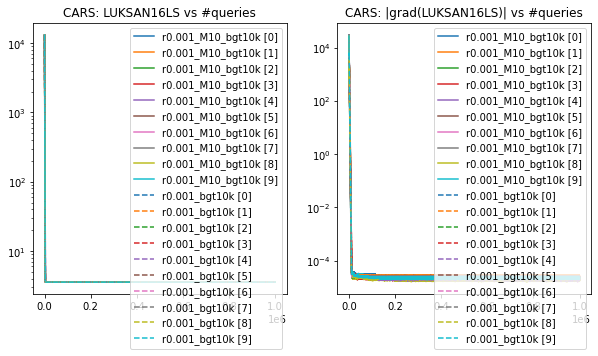

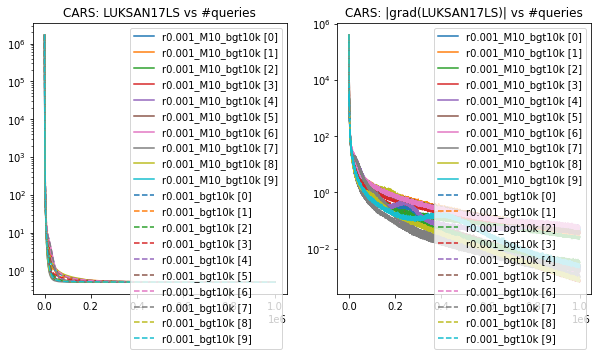

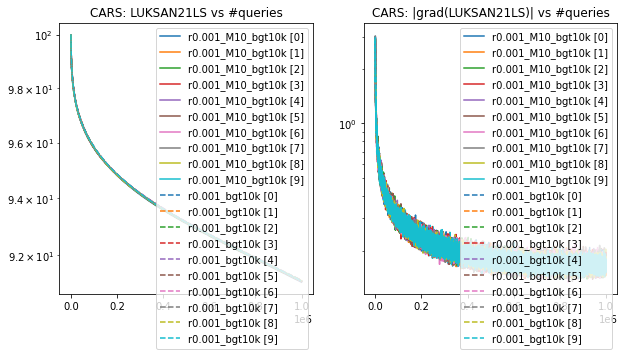

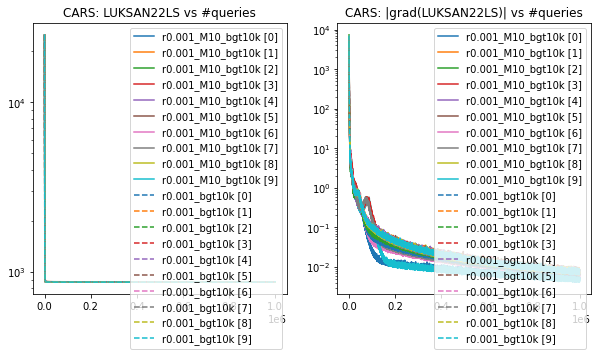

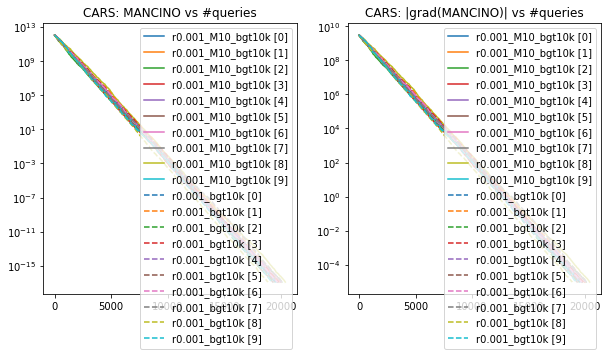

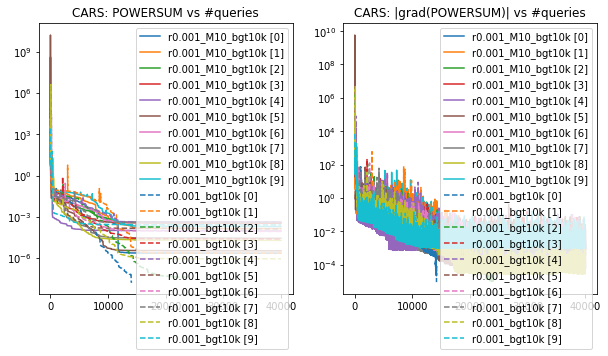

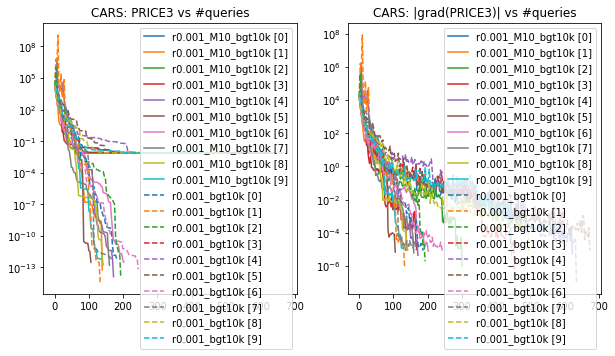

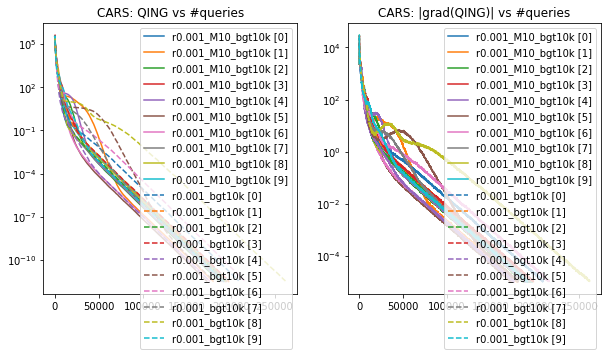

<ipython-input-2-5fcba532dea7>:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax1.set_yscale('log')
C:\Users\Bumsu\AppData\Roaming\Python\Python39\site-packages\ipykernel\pylab\backend_inline.py:231: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


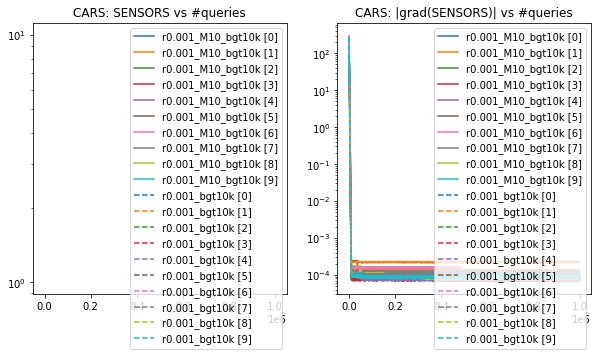

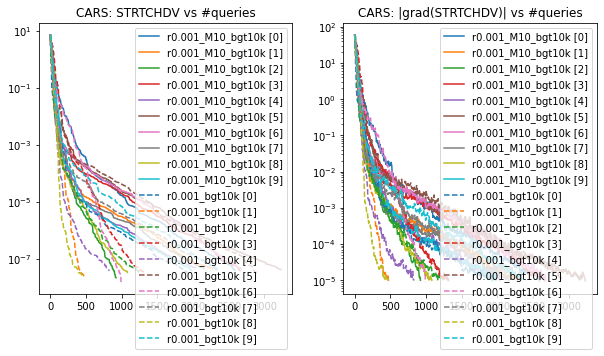

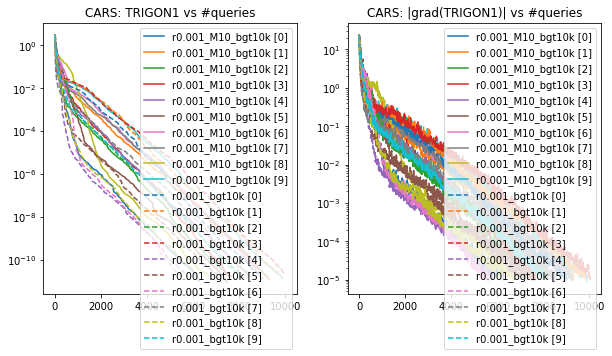

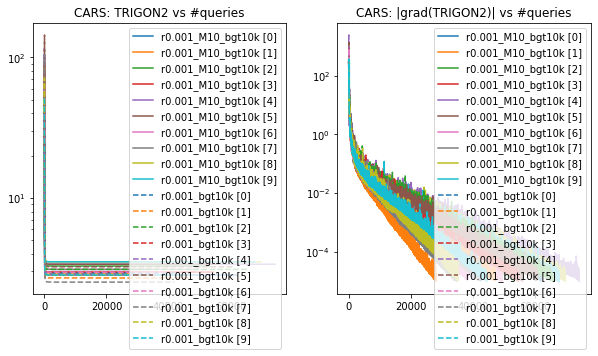

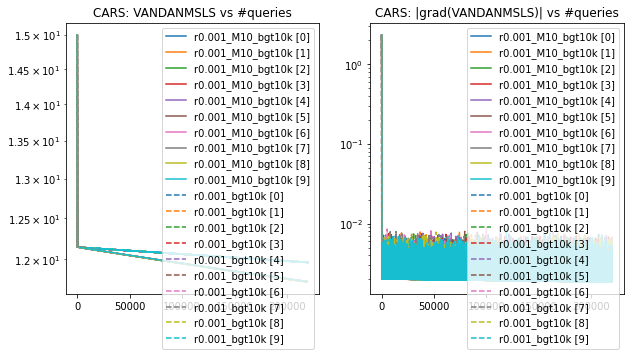

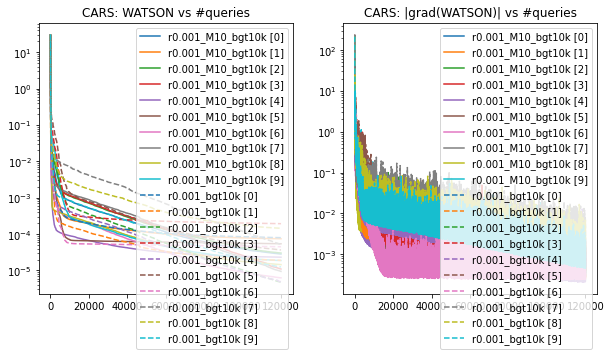

In [4]:
paramoptions_list = ['r0.001_M10_bgt10k', 'r0.001_bgt10k']
maxexpnum = 10
for prob_name in prob_name_list:
    plot_res_mult(default_folder, paramoptions_list, Otype, prob_name, maxexpnum)